In [1]:
import numpy as bp
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Flatten, Dense, Conv2D, MaxPooling2D, Input, Add, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import seaborn as sns
import pandas as pd
import tensorflow.keras.backend as K

In [2]:
physical_devices = tensorflow.config.list_physical_devices("GPU")
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tensorflow.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 4s 0us/step


In [5]:
train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size = 0.2)

In [6]:
d = list(zip(x_train, y_train))
data = pd.DataFrame(data = d, columns = ['image', 'label'])

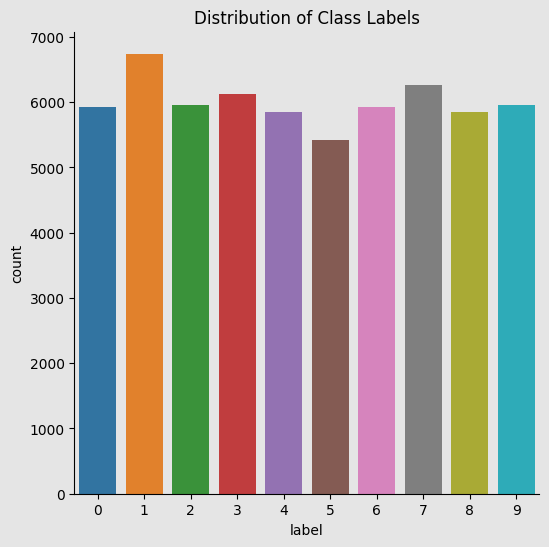

In [7]:
fig, ax = plt.subplots(figsize = (6, 6), facecolor = "#e5e5e5")
ax.set_facecolor("#e5e5e5")

sns.countplot(x = "label", data = data, ax = ax)

ax.set_title("Distribution of Class Labels")
sns.despine()
plt.show()

In [9]:
train_x = train_x/255.0
test_x = test_x/255.0

In [21]:
def modelfn(input_shape = (28,28,1)):
    x_input = Input(input_shape)
    x = x_input
    x = Conv2D(128, kernel_size = (3,3), padding = 'same')(x)
    x = Activation('relu')(x)
    x = Conv2D(64, kernel_size = (3,3), padding = 'same')(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, kernel_size = (3,3), padding = 'same')(x)
    x = Activation('relu')(x)
    x = Conv2D(32, kernel_size = (3,3), padding = 'same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(16, kernel_size = (3,3), padding = 'same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2,2))(x)
    x = Flatten()(x)
    x = Dense(10)(x)
    x = Activation('softmax')(x)
    model = Model(inputs = x_input, outputs = x, name = 'modelfn')
    return model

In [22]:
model = modelfn(input_shape = (28,28,1))

In [23]:
optimizer = Adam(0.0001)
callback = [EarlyStopping(patience = 0.2)]

In [24]:
def customLoss(y_true, y_pred, from_logits=False, axis=-1):
    return K.sparse_categorical_crossentropy(
      y_true, y_pred, from_logits=from_logits, axis=axis)

In [25]:
model.compile(optimizer=optimizer, loss=customLoss, metrics=['accuracy'])

In [26]:
model.summary()

Model: "modelfn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 activation_6 (Activation)   (None, 28, 28, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 activation_7 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                           

In [27]:
history = model.fit(train_x, train_y, validation_split = 0.2, epochs = 10, batch_size=64)

Epoch 1/10
600/600 [==============================] - 7s 10ms/step - loss: 0.7465 - accuracy: 0.7509 - val_loss: 1.1034 - val_accuracy: 0.6381
Epoch 2/10
600/600 [==============================] - 6s 10ms/step - loss: 0.2090 - accuracy: 0.9379 - val_loss: 0.2059 - val_accuracy: 0.9364
Epoch 3/10
600/600 [==============================] - 6s 10ms/step - loss: 0.1598 - accuracy: 0.9539 - val_loss: 0.1864 - val_accuracy: 0.9447
Epoch 4/10
600/600 [==============================] - 6s 10ms/step - loss: 0.1322 - accuracy: 0.9610 - val_loss: 0.1720 - val_accuracy: 0.9502
Epoch 5/10
600/600 [==============================] - 6s 10ms/step - loss: 0.1130 - accuracy: 0.9677 - val_loss: 0.1165 - val_accuracy: 0.9654
Epoch 6/10
600/600 [==============================] - 6s 10ms/step - loss: 0.1002 - accuracy: 0.9705 - val_loss: 0.1094 - val_accuracy: 0.9670
Epoch 7/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0915 - accuracy: 0.9737 - val_loss: 0.1139 - val_accuracy: 0.9647

C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

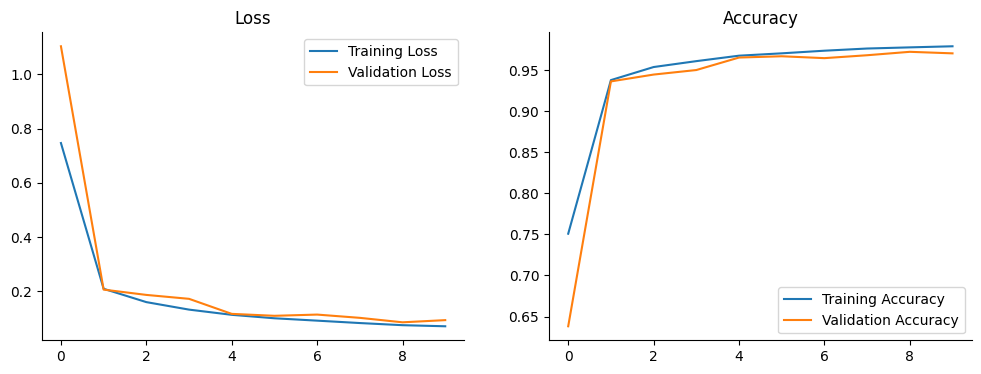

In [28]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history["loss"])), y = history.history["loss"], ax = axes[0], label = "Training Loss")
sns.lineplot(x = range(len(history.history["loss"])), y = history.history["val_loss"], ax = axes[0], label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])), y = history.history["accuracy"], ax = axes[1], label = "Training Accuracy")
sns.lineplot(x = range(len(history.history["accuracy"])), y = history.history["val_accuracy"], ax = axes[1], label = "Validation Accuracy")
axes[0].set_title("Loss"); axes[1].set_title("Accuracy")

sns.despine()
plt.show()

In [29]:
model.evaluate(x_test, y_test)[1]

313/313 [==============================] - 1s 3ms/step - loss: 1623.3676 - accuracy: 0.9684


0.9684000015258789

In [30]:
model_json = model.to_json()

In [31]:
with open('model_json.json','w') as json_file:
    json_file.write(model_json)

In [32]:
model.save_weights('model.h5')

In [35]:
import numpy as np
img_resized = np.resize(x_test[0], (28, 28, 1))
img = np.expand_dims(img_resized, axis=0)
img = img/255.0
model.predict(img)

1/1 [==============================] - 0s 337ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

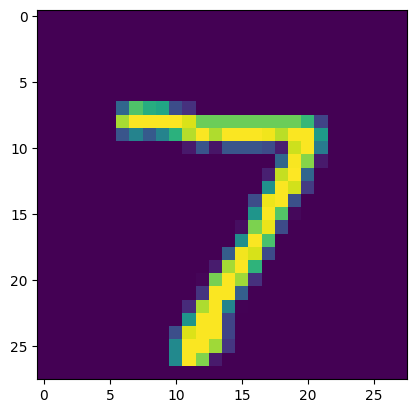

In [37]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])